In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

dataset = pd.read_csv("C:/Users/user/Downloads/diabetes.csv")
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [2]:
dataset.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

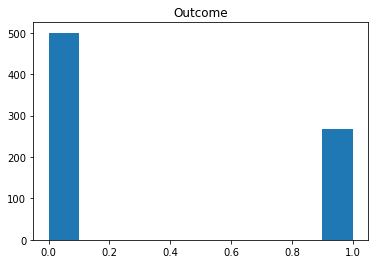

In [3]:
dataset.describe()
plt.hist(dataset['Outcome'])
plt.title('Outcome')
plt.show()

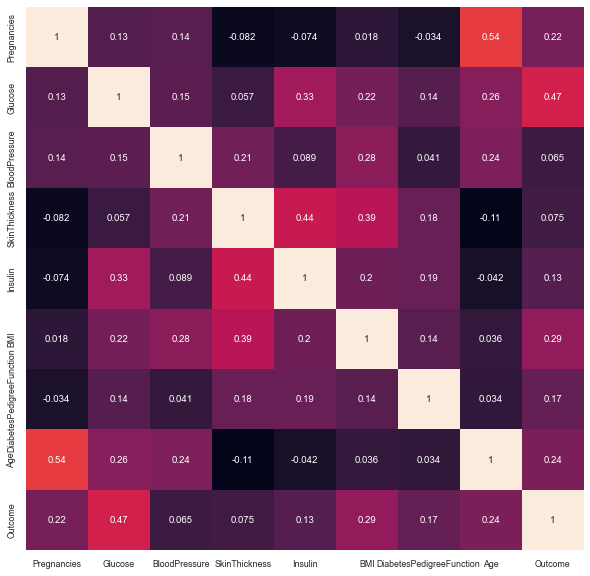

In [4]:
dataset_corr=dataset.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(dataset_corr, annot=True, cbar=False)
plt.show()

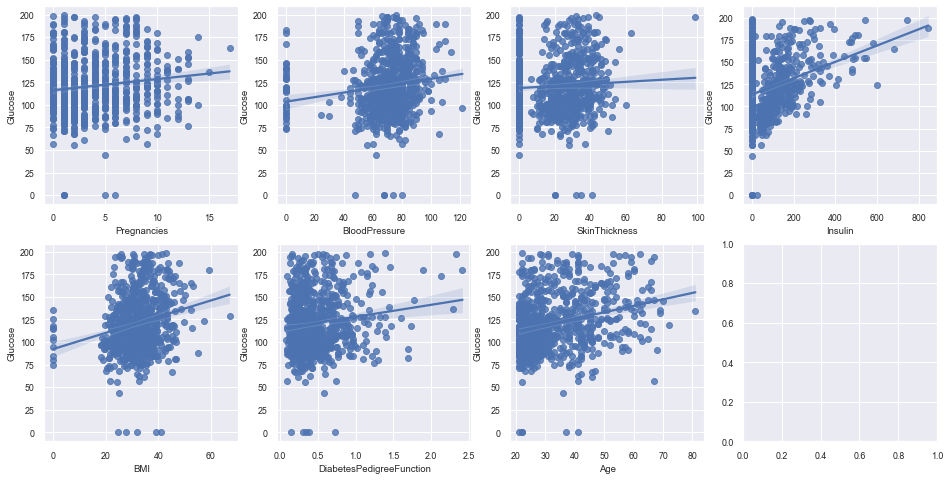

In [5]:
fig, axs = plt.subplots(figsize=(16,8), ncols=4,  nrows=2)

lm_features = ['Pregnancies', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

for i, feature in enumerate(lm_features):
    row = int(i/4) # 2행
    col = i%4
    sns.regplot(x=feature, y='Glucose', data=dataset, ax=axs[row][col])

In [6]:
X=dataset.drop(['Outcome', 'BMI'],axis=1)

In [7]:
Y=dataset['BMI']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.25,random_state=42)

In [9]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(32, activation = 'relu', input_shape = (7,)))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                256       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 929
Trainable params: 929
Non-trainable params: 0
_________________________________________________________________


In [11]:
N_EPOCHS = 100
history = model.fit(X_train, y_train, epochs = N_EPOCHS, validation_data=(X_test, y_test))

Epoch 1/100
18/18 [==============================] - 0s 8ms/step - loss: 356.9502 - mse: 356.9502 - val_loss: 160.2426 - val_mse: 160.2426
Epoch 2/100
18/18 [==============================] - 0s 2ms/step - loss: 125.7275 - mse: 125.7275 - val_loss: 108.5652 - val_mse: 108.5652
Epoch 3/100
18/18 [==============================] - 0s 2ms/step - loss: 95.2670 - mse: 95.2670 - val_loss: 90.3146 - val_mse: 90.3146
Epoch 4/100
18/18 [==============================] - 0s 2ms/step - loss: 76.9095 - mse: 76.9095 - val_loss: 73.4389 - val_mse: 73.4389
Epoch 5/100
18/18 [==============================] - 0s 2ms/step - loss: 71.0124 - mse: 71.0124 - val_loss: 67.5198 - val_mse: 67.5198
Epoch 6/100
18/18 [==============================] - 0s 2ms/step - loss: 64.5948 - mse: 64.5948 - val_loss: 65.0828 - val_mse: 65.0828
Epoch 7/100
18/18 [==============================] - 0s 2ms/step - loss: 61.0071 - mse: 61.0071 - val_loss: 62.7080 - val_mse: 62.7080
Epoch 8/100
18/18 [============================

18/18 [==============================] - 0s 2ms/step - loss: 43.0350 - mse: 43.0350 - val_loss: 54.1812 - val_mse: 54.1812
Epoch 62/100
18/18 [==============================] - 0s 2ms/step - loss: 42.3346 - mse: 42.3346 - val_loss: 53.3564 - val_mse: 53.3564
Epoch 63/100
18/18 [==============================] - 0s 2ms/step - loss: 41.7122 - mse: 41.7122 - val_loss: 54.6944 - val_mse: 54.6944
Epoch 64/100
18/18 [==============================] - 0s 2ms/step - loss: 41.6077 - mse: 41.6077 - val_loss: 51.6286 - val_mse: 51.6286
Epoch 65/100
18/18 [==============================] - 0s 2ms/step - loss: 42.2147 - mse: 42.2147 - val_loss: 51.7409 - val_mse: 51.7409
Epoch 66/100
18/18 [==============================] - 0s 2ms/step - loss: 40.7913 - mse: 40.7913 - val_loss: 51.9078 - val_mse: 51.9078
Epoch 67/100
18/18 [==============================] - 0s 2ms/step - loss: 42.7222 - mse: 42.7222 - val_loss: 52.6737 - val_mse: 52.6737
Epoch 68/100
18/18 [==============================] - 0s 1ms/

In [12]:
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 922us/step - loss: 51.8823 - mse: 51.8823


[51.88229751586914, 51.88229751586914]

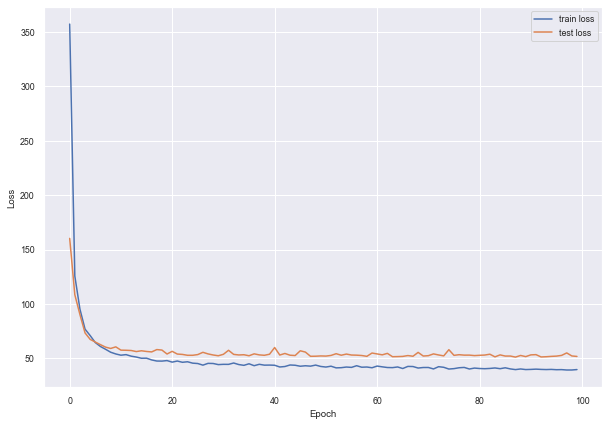

In [13]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

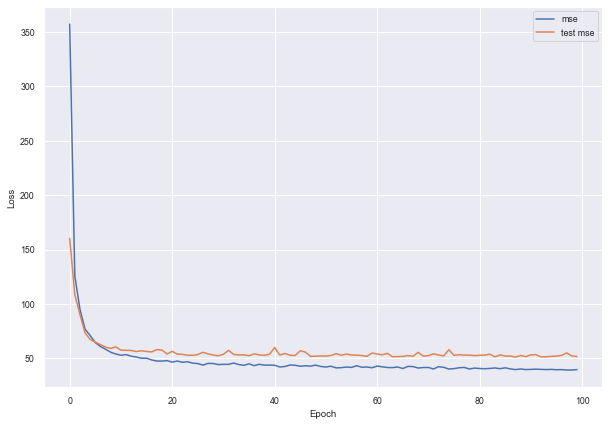

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['mse'], label='mse')
plt.plot(range(N_EPOCHS), history.history['val_mse'], label='test mse')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()